In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Understanding

In [27]:
df = pd.read_csv('online_retail.csv')
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


Dataset terdiri dari 9 kolom dan 541,908 baris.

Terdapat 2 kolom yang mengalami missing values, yaitu kolom Description dan CustomerID.

# Data Cleaning

## Missing Values

In [29]:
df.isnull().sum()

index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Menghilangkan baris yang memiliki missing value.

In [30]:
df.dropna(subset=['Description', 'CustomerID'], inplace=True)

In [31]:
df.isna().sum()

index          0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## Duplicate Data

In [32]:
df.duplicated().sum()

0

Tidak terdapat duplikasi data pada dataset ini.

## Data Integrity

Mengubah data type pada kolom CustomerID dari numeric menjadi string.

In [33]:
df['CustomerID'] = df['CustomerID'].astype(str)

Mengubah data type pada kolom InvoiceDate dari string menjadi date

In [34]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Sales Analysis

## A. Total Sales

In [35]:
# # Menambahkan kolom Month dan Year pada dataset
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year

In [36]:
# Menambahkan kolom revenue
# revenue = Quantity x UnitPrice
df['Revenue'] = round(df['Quantity'] * df['UnitPrice'], 2)
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Revenue
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34


In [37]:
# Membuat dataframe Sales
sales = pd.pivot_table(df,
                       index = ['Month', 'Year'],
                       values = ['InvoiceNo', 'Revenue'],
                       aggfunc = {'InvoiceNo' : ['count'],
                                  'Revenue' : ['sum']}
                        ).reset_index()

sales.columns = ['Month', 'Year', 'Total_Order', 'Total_Revenue']
sales.sort_values(by='Year')

,Month,Year,Total_Order,Total_Revenue
11,12,2010,26850,554604.02
0,1,2011,21912,475074.38
1,2,2011,20363,436546.15
2,3,2011,27822,579964.61
3,4,2011,23198,426047.85
4,5,2011,28908,648251.08
5,6,2011,27836,608013.16
6,7,2011,27502,574238.48
7,8,2011,27662,616368.00
8,9,2011,40822,931440.37


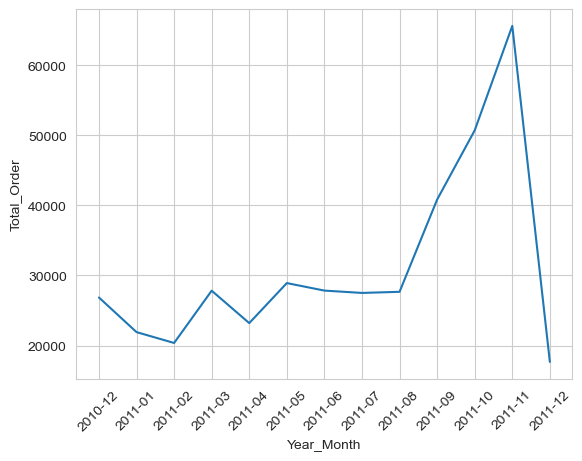

In [38]:
# Menambahkan kolom Year_Month pada dataframe Sales
sales['Year_Month'] = sales['Year'].astype(str) + '-' + sales['Month'].astype(str)
sales['Year_Month'] = pd.to_datetime(sales['Year_Month'], format='%Y-%m')
sales['Year_Month'] = sales['Year_Month'].dt.strftime('%Y-%m')

sorted_sales = sales.sort_values(by='Year_Month')

sns.lineplot(data=sorted_sales, x='Year_Month', y='Total_Order')
plt.xticks(rotation=45)
plt.show()

Terdapat anomali pada bulan Desember 2011, dimana terjadi penurunan yang sangat drastis.

In [39]:
a = df[df['InvoiceDate'] >= '2011-12-01']
a['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

Setelah ditelusuri, ternyata data pada bulan Desember 2011 hanya tersedia sampai tanggal 9 sehingga data ini tidak akan dicantumkan dalam analisis.

Analisis total sales ditampilkan pada visualisasi di bawah ini:

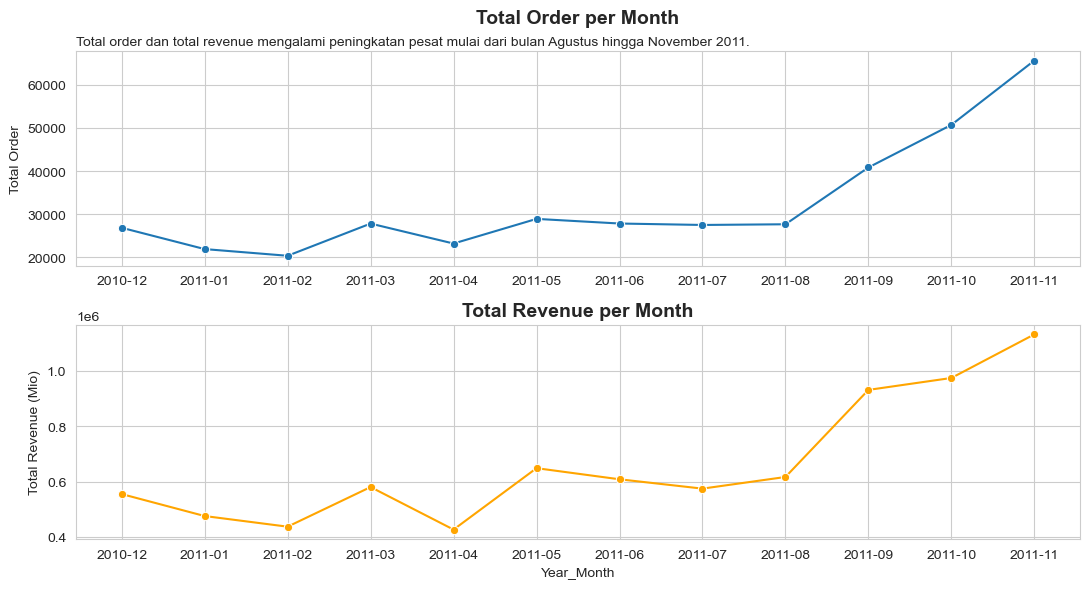

In [69]:
sales_filtered = sales[sales['Year_Month'] != '2011-12']
sorted_sales_filtered = sales_filtered.sort_values(by='Year_Month')

sns.set_style("whitegrid")

# Subplot 1
plt.figure(figsize=(11,6))
ax1 = plt.subplot(2, 1, 1)
sns.lineplot(data=sorted_sales_filtered, x='Year_Month', y='Total_Order', marker='o', ax=ax1)
plt.title('Total Order per Month', fontsize=14, fontweight='bold', pad=20)
plt.xlabel("")
plt.ylabel('Total Order')

plt.text(x=0, y=1.07, s='Total order dan total revenue mengalami peningkatan pesat mulai dari bulan Agustus hingga November 2011.', 
         transform=plt.gca().transAxes, ha='left', va='top', fontsize=10)

# Subplot 2
ax2 = plt.subplot(2, 1, 2, sharex=ax1)
sns.lineplot(data=sorted_sales_filtered, x='Year_Month', y='Total_Revenue', marker='o', color='orange', ax=ax2)
plt.ylabel('Total Revenue (Mio)')
plt.title('Total Revenue per Month', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [53]:
df['Description'].sample(5)

233733            SET OF 4 JAM JAR MAGNETS
526461     GREEN REGENCY TEACUP AND SAUCER
82071             CUPCAKE LACE PAPER SET 6
464329    PLASTERS IN TIN WOODLAND ANIMALS
329823    PLASTERS IN TIN WOODLAND ANIMALS
Name: Description, dtype: object

## B. Sales by Product

In [50]:
# Membuat dataframe top product
top_products = pd.pivot_table(df,
                            index = 'Description',
                            values = ['Quantity', 'Revenue'],
                            aggfunc = {'Quantity' : 'sum',
                                        'Revenue' : 'sum'}
                                 ).reset_index()
top_products.columns = ['Product', 'Qnty_sold', 'Revenue']
top_products = top_products.sort_values(by = 'Qnty_sold', ascending=False).head(5)
top_products

,Product,Qnty_sold,Revenue
3805,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215,13332.33
1771,JUMBO BAG RED RETROSPOT,45066,83236.76
217,ASSORTED COLOUR BIRD ORNAMENT,35314,56499.22
3716,WHITE HANGING HEART T-LIGHT HOLDER,34147,93823.85
2279,PACK OF 72 RETROSPOT CAKE CASES,33409,16247.95


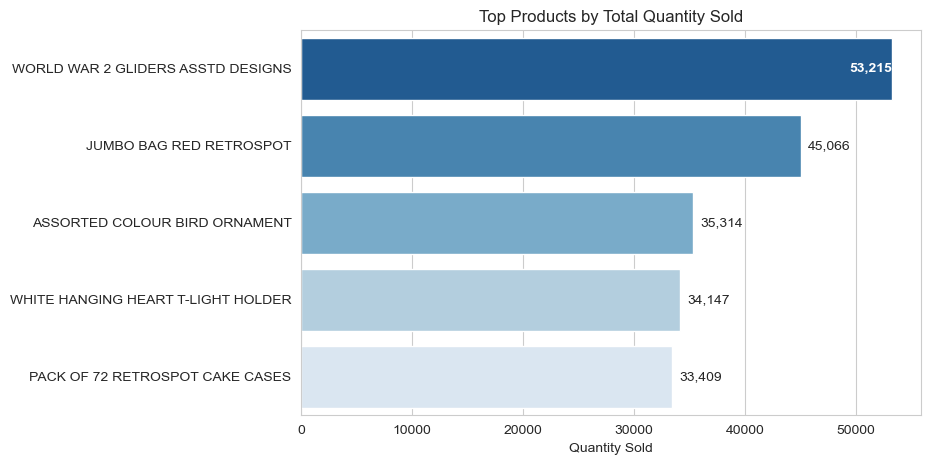

In [43]:
plt.figure(figsize=(8, 5))

# Generate a blue gradient palette
blue_palette = sns.color_palette("Blues_r", len(top_products))

# Plot the barplot using the generated palette
ax = sns.barplot(data=top_products, x='Qnty_sold', y='Product', orient='h', palette=blue_palette)

# Add data labels to each bar
for i, bar in enumerate(ax.patches):
    if i == 0:  # For the first bar
        # Annotate inside the first bar
        ax.annotate('{:,.0f}'.format(bar.get_width()), 
                    xy=(bar.get_width() - 5, bar.get_y() + bar.get_height() / 2),
                    xytext=(0, 0), textcoords='offset points', ha='right', va='center', color='white', weight='bold')
    else:  # For the rest of the bars
        ax.annotate('{:,.0f}'.format(bar.get_width()), 
                    xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                    xytext=(5, 0), textcoords='offset points', ha='left', va='center')

plt.xlabel('Quantity Sold')
plt.ylabel('')
plt.title('Top Products by Total Quantity Sold')

plt.show()

Product yang paling banyak terjual adalah WORLD WAR 2 GLIDERS ASSTD DESIGNS, sebanyak 51,852; disusul JUMBO BAG RED RETROSPOT, ASSORED COLOUR BIRD ORNAMENT, WHITE HANGING HEART T-LIGHT HOLDER, dan PACK OF 72 RETROSPOT CAKE CASES.

## C. Sales by Country

In [44]:
# Membuat dataframe sales_by_country
sales_by_country = df.groupby('Country').agg({'Revenue' : 'sum'}).reset_index()
sales_by_country.columns = ['Country', 'Revenue']
top_countries = sales_by_country.sort_values(by='Revenue', ascending=False).head(5)
top_countries

,Country,Revenue
35,United Kingdom,6767873.39
23,Netherlands,284661.54
10,EIRE,250285.22
14,Germany,221698.21
13,France,196712.84


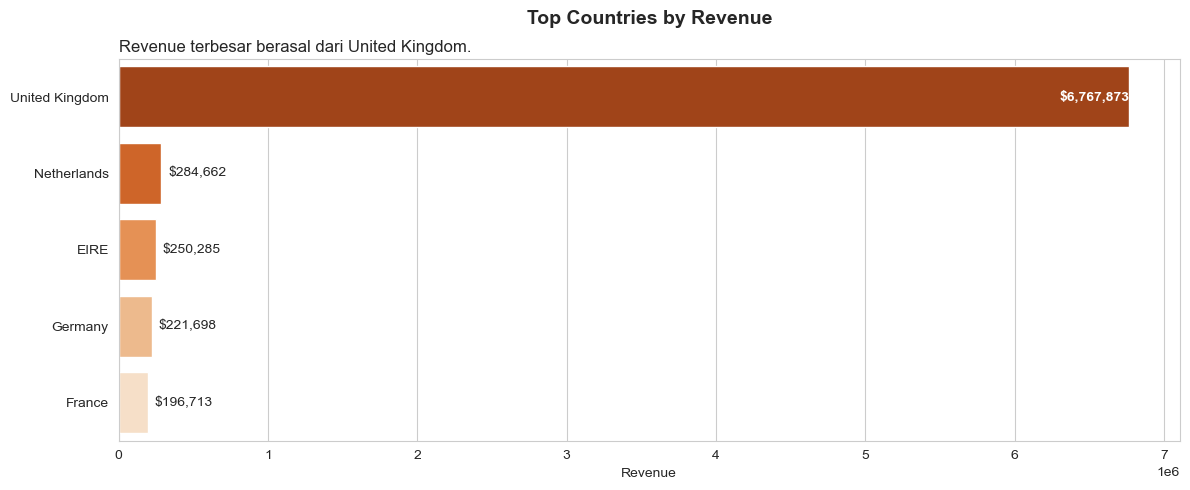

In [45]:
plt.figure(figsize=(12,5))
orange_palette = sns.color_palette("Oranges_r", len(top_countries))

ax = sns.barplot(data=top_countries, x='Revenue', y='Country', orient='h', palette=orange_palette)

plt.ylabel('')
plt.title('Top Countries by Revenue', fontsize=14, fontweight='bold', pad=25)

plt.text(x=0, y=1.05, s='Revenue terbesar berasal dari United Kingdom.', 
         transform=plt.gca().transAxes, ha='left', va='top', fontsize=12)

for i, bar in enumerate(ax.patches):
    if i == 0: 
        ax.annotate('${:,.0f}'.format(bar.get_width()), 
                    xy=(bar.get_width() - 5, bar.get_y() + bar.get_height() / 2),
                    xytext=(0, 0), textcoords='offset points', ha='right', va='center', color='white', weight='bold')
    else: 
        ax.annotate('${:,.0f}'.format(bar.get_width()), 
                    xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                    xytext=(5, 0), textcoords='offset points', ha='left', va='center')

plt.tight_layout()
plt.show()

In [55]:
a = [284, 250, 222, 197]
sum(a) / len(a)

238.25

# RFM Analysis

RFM Analysis adalah teknik yang digunakan dalam pemasaran dan analisis pelanggan untuk memahami perilaku pembelian pelanggan dan mengelompokkan mereka berdasarkan tiga dimensi utama:

1. **Recency (Ketepatan Waktu)**: Mengukur seberapa baru pelanggan telah melakukan pembelian.
2. **Frequency (Frekuensi)**: Mengukur seberapa sering pelanggan melakukan pembelian dalam periode waktu tertentu.
3. **Monetary (Moneter)**: Mengukur seberapa banyak uang yang dihabiskan oleh pelanggan dalam periode waktu tertentu.

In [46]:
# Membuat dataframe RFM
from datetime import datetime

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate' : lambda date: (datetime.strptime('2011-12-15', '%Y-%m-%d') - date.max()).days,
    'InvoiceNo' : 'count',
    'Revenue' : 'sum'
    }).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.sort_values(by=['Frequency', 'Monetary'], ascending=False).head()

,CustomerID,Recency,Frequency,Monetary
4042,17841.0,6,7983,40340.78
1895,14911.0,6,5903,132572.62
1300,14096.0,9,5128,57120.91
330,12748.0,5,4642,29072.10
1674,14606.0,6,2782,11713.85


In [52]:
# Me-ranking RFM berdasarkan quartile
rfm['r_quartile'] = pd.qcut(rfm['Recency'], 4, ['1', '2', '3', '4'])
rfm['f_quartile'] = pd.qcut(rfm['Frequency'], 4, ['4', '3', '2', '1'])
rfm['m_quartile'] = pd.qcut(rfm['Monetary'], 4, ['4', '3', '2', '1'])

rfm.head()

,CustomerID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score
0,12346.0,330,2,0.00,4,4,4,444
1,12347.0,7,182,4310.00,1,1,1,111
2,12348.0,80,31,1797.24,3,3,1,331
3,12349.0,23,73,1757.55,2,2,1,221
4,12350.0,315,17,334.40,4,4,3,443


In [48]:
# Membuat kolom RFM_Score
rfm['RFM_Score'] = rfm['r_quartile'].astype(str) + rfm['f_quartile'].astype(str) + rfm['m_quartile'].astype(str)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score
0,12346.0,330,2,0.00,4,4,4,444
1,12347.0,7,182,4310.00,1,1,1,111
2,12348.0,80,31,1797.24,3,3,1,331
3,12349.0,23,73,1757.55,2,2,1,221
4,12350.0,315,17,334.40,4,4,3,443


In [49]:
# Top customers
column_list = rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'RFM_Score']]

top_customers = column_list[column_list['RFM_Score']=='111'].sort_values(by='Monetary', ascending=False).head()
top_customers

,CustomerID,Recency,Frequency,Monetary,RFM_Score
1703,14646.0,6,2085,279489.02,111
4233,18102.0,5,433,256438.49,111
3758,17450.0,13,351,187482.17,111
1895,14911.0,6,5903,132572.62,111
1345,14156.0,14,1420,113384.14,111


Tabel di atas merupakan top customers yang diperoleh dari hasil analisis RFM. </br>
Terlihat bahwa customer dengan ID 14646 memiliki nilai monetary tertinggi, yaitu dengan total belanja sebesar USD 279,489. Customer ini telah melakukan pembelian sebanyak 2085 kali, dengan riwayat transaksi terakhir pada 6 hari yang lalu.